# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
###################################################################################
##
##  Python API Homework - What's the Weather Like
##        Part I - WeatherPY
##
##
##          Author: George Alonzo
##        Due Date: October 9, 2021
##
###################################################################################

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"City Count: {len(cities)}")

City Count: 642


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_l = []
country = []
datetime = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []

errors = 0
processed = 0
n=0

for city in cities:
    n += 1 
    try:
        response = requests.get(query_url + city).json()
        print(f"{n}. Processing City Number: {response['id']} | City: {city} ")
        city_l.append(response['name'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        processed +=1
    except:
        print(f"*** ERROR PROCESSING CITY {city}")
        errors +=1
    time.sleep(1)

# Print summary stats on the processing
print("--- PROCESSING COMPLETE ---")
print(f"Successfully Processed: {processed}")
print(f"    Errors Encountered: {errors}")

1. Processing City Number: 2094144 | City: kerema 
2. Processing City Number: 3430863 | City: mar del plata 
3. Processing City Number: 1267390 | City: kavaratti 
4. Processing City Number: 5557293 | City: sitka 
5. Processing City Number: 3833367 | City: ushuaia 
6. Processing City Number: 2126123 | City: chokurdakh 
7. Processing City Number: 3831208 | City: qaanaaq 
8. Processing City Number: 5880054 | City: barrow 
9. Processing City Number: 1045114 | City: inhambane 
10. Processing City Number: 4020109 | City: atuona 
11. Processing City Number: 3421319 | City: nuuk 
12. Processing City Number: 3347019 | City: namibe 
13. Processing City Number: 3361934 | City: saldanha 
14. Processing City Number: 2172880 | City: byron bay 
*** ERROR PROCESSING CITY amderma
16. Processing City Number: 6170031 | City: tuktoyaktuk 
17. Processing City Number: 4036284 | City: alofi 
18. Processing City Number: 1735106 | City: georgetown 
*** ERROR PROCESSING CITY belushya guba
20. Processing City Nu

158. Processing City Number: 4021858 | City: guerrero negro 
159. Processing City Number: 5391295 | City: salinas 
160. Processing City Number: 1651531 | City: ambon 
161. Processing City Number: 4513583 | City: hamilton 
162. Processing City Number: 1793899 | City: suicheng 
163. Processing City Number: 5881688 | City: fort saint james 
164. Processing City Number: 5924351 | City: clyde river 
165. Processing City Number: 2022572 | City: khatanga 
166. Processing City Number: 3464724 | City: diamantino 
167. Processing City Number: 2027316 | City: ayan 
168. Processing City Number: 2071860 | City: esperance 
169. Processing City Number: 3354540 | City: omaruru 
*** ERROR PROCESSING CITY marcona
171. Processing City Number: 2063036 | City: port lincoln 
172. Processing City Number: 2264557 | City: ponta do sol 
173. Processing City Number: 5563839 | City: fortuna 
*** ERROR PROCESSING CITY taburao
175. Processing City Number: 2208248 | City: kaitangata 
176. Processing City Number: 346

312. Processing City Number: 1505965 | City: igrim 
313. Processing City Number: 2649738 | City: fairlie 
*** ERROR PROCESSING CITY harigue
315. Processing City Number: 1024312 | City: mocuba 
316. Processing City Number: 3423146 | City: ilulissat 
317. Processing City Number: 515246 | City: onega 
318. Processing City Number: 2598243 | City: soubre 
319. Processing City Number: 2013727 | City: vanavara 
320. Processing City Number: 3985710 | City: cabo san lucas 
321. Processing City Number: 1701054 | City: marawi 
322. Processing City Number: 3439389 | City: asuncion 
323. Processing City Number: 290030 | City: doha 
324. Processing City Number: 1507379 | City: divnogorsk 
325. Processing City Number: 4993659 | City: garden city 
326. Processing City Number: 4385966 | City: excelsior springs 
327. Processing City Number: 3095058 | City: kostrzyn 
328. Processing City Number: 139817 | City: bushehr 
329. Processing City Number: 3980782 | City: ures 
330. Processing City Number: 585055

464. Processing City Number: 3451051 | City: rio verde de mato grosso 
465. Processing City Number: 2063056 | City: port augusta 
466. Processing City Number: 2128975 | City: nemuro 
467. Processing City Number: 2176639 | City: batemans bay 
468. Processing City Number: 1259395 | City: porbandar 
*** ERROR PROCESSING CITY warqla
470. Processing City Number: 5326297 | City: barstow 
471. Processing City Number: 3386213 | City: touros 
472. Processing City Number: 1151073 | City: prachuap khiri khan 
473. Processing City Number: 1735634 | City: kuching 
474. Processing City Number: 1250161 | City: batticaloa 
475. Processing City Number: 89113 | City: ajdabiya 
476. Processing City Number: 921786 | City: mitsamiouli 
477. Processing City Number: 2381972 | City: adrar 
478. Processing City Number: 1508501 | City: chadan 
479. Processing City Number: 3520994 | City: puerto escondido 
480. Processing City Number: 3105522 | City: bereda 
481. Processing City Number: 3573374 | City: the valle

616. Processing City Number: 780687 | City: berlevag 
617. Processing City Number: 5712169 | City: baker city 
618. Processing City Number: 5949563 | City: esterhazy 
619. Processing City Number: 2294700 | City: tema 
620. Processing City Number: 580299 | City: avdon 
621. Processing City Number: 2274895 | City: monrovia 
622. Processing City Number: 4273680 | City: junction city 
623. Processing City Number: 6853140 | City: lesnoy 
624. Processing City Number: 2058430 | City: whyalla 
625. Processing City Number: 4791259 | City: virginia beach 
626. Processing City Number: 2279755 | City: yamoussoukro 
627. Processing City Number: 1244926 | City: hambantota 
*** ERROR PROCESSING CITY tsihombe
629. Processing City Number: 3901547 | City: villamontes 
630. Processing City Number: 2156643 | City: mount gambier 
631. Processing City Number: 915471 | City: kalabo 
632. Processing City Number: 1173302 | City: kot diji 
*** ERROR PROCESSING CITY kazalinsk
634. Processing City Number: 6067747

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame
weather_dict = {
    "city": city_l,
    "country": country, 
    "datetime": datetime,
    "lat": lat,
    "long": long,
    "maxtemp" : maxtemp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)
weather_data.head()

,city,country,datetime,lat,long,maxtemp,humidity,cloudiness,windspeed
0,Kerema,PG,1633808781,-7.9631,145.7785,76.82,92,93,6.08
1,Mar del Plata,AR,1633808782,-38.0023,-57.5575,57.22,66,0,17.00
2,Kavaratti,IN,1633808608,10.5669,72.6420,82.24,80,98,10.51
3,Sitka,US,1633808784,57.0531,-135.3300,49.89,71,90,17.27
4,Ushuaia,AR,1633808786,-54.8000,-68.3000,51.46,62,40,9.22


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
weather_data["humidity"].max()

100

In [6]:
#  Get the indices of cities that have humidity over 100%.
invalid_data = weather_data[weather_data["humidity"] > 100]
invalid_data

,city,country,datetime,lat,long,maxtemp,humidity,cloudiness,windspeed


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"# of Rows in Data Frame BEFORE: {len(weather_data)}")
clean_weather_data = weather_data[weather_data["humidity"] <= 100]
print(f"# of Rows in Data Frame AFTER: {len(clean_weather_data)}")

# of Rows in Data Frame BEFORE: 592
# of Rows in Data Frame AFTER: 592


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

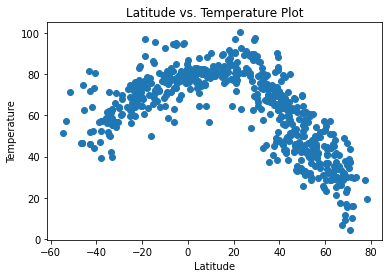

In [8]:
x_values = clean_weather_data['lat']
y_values = clean_weather_data['maxtemp']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('images/LatVsTemp.png')
plt.show()

## Latitude vs. Humidity Plot

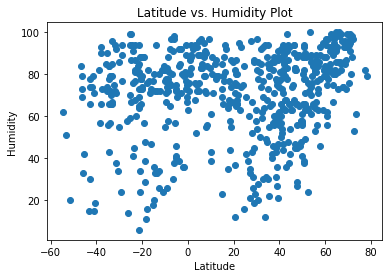

In [9]:
x_values = clean_weather_data['lat']
y_values = clean_weather_data['humidity']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('images/LatVsHum.png')
plt.show()

## Latitude vs. Cloudiness Plot

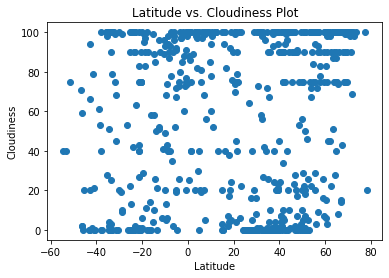

In [10]:
x_values = clean_weather_data['lat']
y_values = clean_weather_data['cloudiness']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('images/LatVsCloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

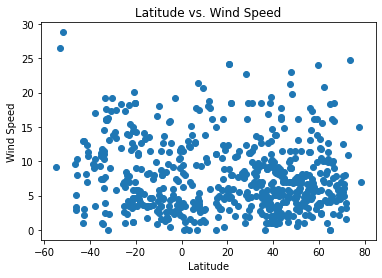

In [11]:
x_values = clean_weather_data['lat']
y_values = clean_weather_data['windspeed']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('images/LatVsWind.png')
plt.show()

## Linear Regression

In [12]:
n_hemisphere = clean_weather_data.loc[weather_data["lat"] > 0]
s_hemisphere = clean_weather_data.loc[weather_data["lat"] < 0]
equator = clean_weather_data.loc[weather_data["lat"] == 0]

# Confirm no city is on the equator
equator

,city,country,datetime,lat,long,maxtemp,humidity,cloudiness,windspeed


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

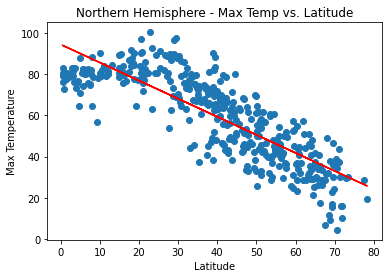

The correlation is -0.83


In [13]:
x_values = n_hemisphere['lat']
y_values = n_hemisphere['maxtemp']
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
#plt.show()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.savefig('images/NHem-MTempVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

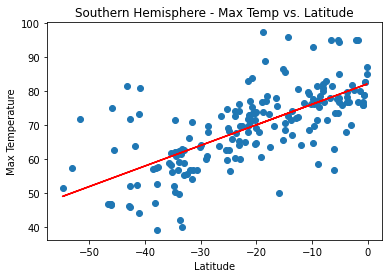

The correlation is 0.69


In [14]:
x_values = s_hemisphere['lat']
y_values = s_hemisphere['maxtemp']
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.savefig('images/SHem-MTempVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

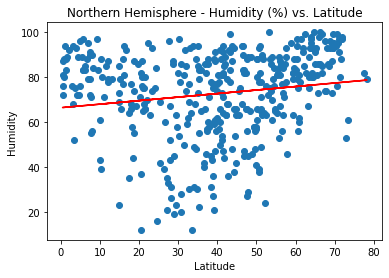

The correlation is 0.16


In [15]:
x_values = n_hemisphere['lat']
y_values = n_hemisphere['humidity']
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.savefig('images/NHem-HumidVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

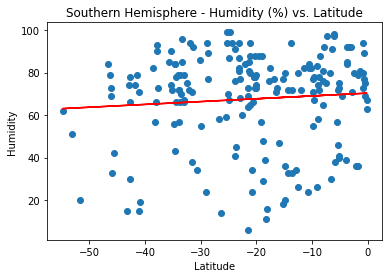

The correlation is 0.08


In [16]:
x_values = s_hemisphere['lat']
y_values = s_hemisphere['humidity']
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.savefig('images/SHem-HumidVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

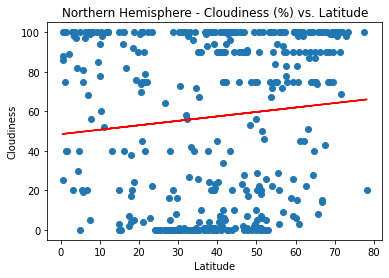

The correlation is 0.11


In [17]:
x_values = n_hemisphere['lat']
y_values = n_hemisphere['cloudiness']
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.savefig('images/NHem-CloudVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

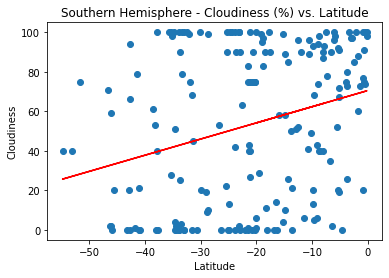

The correlation is 0.28


In [18]:
x_values = s_hemisphere['lat']
y_values = s_hemisphere['cloudiness']
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.savefig('images/SHem-CloudVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

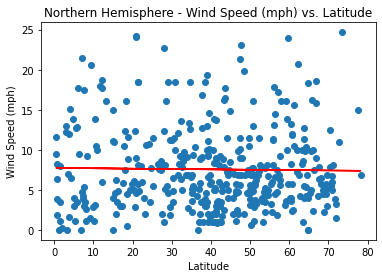

The correlation is -0.02


In [19]:
x_values = n_hemisphere['lat']
y_values = n_hemisphere['windspeed']
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.savefig('images/NHem-WindVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

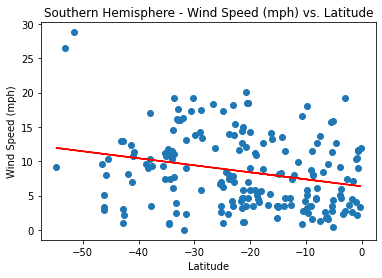

The correlation is -0.25


In [20]:
x_values = s_hemisphere['lat']
y_values = s_hemisphere['windspeed']
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.savefig('images/SHem-WindVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

Three Observable Trends:|

NOTE:  Since the results are based on current weather, the output (particularly for the VacationPy part) varies depending on the time of day this was run.  (I had significantly fewer ideal cities for the VacationPy exercise when I ran the Weather API in the morning vs re-running in the afternoon.)

1)  There is a very strong correlation between the Latitute and Max temperature (closer to the equator, the warmer temperature you can expect).  

2)  The correlation is stronger with the Northern Hemisphere vs Southern Hemisphere, likely due to the Earth's current tilt & seasons.

3)  There is little to no correlation with the Latitude and Humidity, Cloudiness, or Wind Speed.